##import

In [ ]:
import numpy as np
import pandas as pd

# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

!pip install plotly_express
import plotly
import plotly_express as px
!pip install pymannkendall
import pymannkendall as mk

In [ ]:
data = pd.read_csv('final.csv')

In [ ]:
data

min_temperature  max_temperature  avg_temperature  avg_wind_speed  \
0                 -6.7              0.6            -3.05            13.0   
1                 -1.1              1.7             0.29             9.5   
2                 -2.2              1.7            -0.25            16.0   
3                -11.7             -2.2            -6.94            14.0   
4                 -6.7             -1.1            -3.90            20.0   
...                ...              ...              ...             ...   
25562             -7.1             -1.4            -4.25            19.0   
25563             -1.4              4.6             1.60            17.0   
25564              2.0              9.5             5.75            17.0   
25565              8.2             13.1            10.64            16.5   
25566              2.7              9.7             6.19            17.0   

       precipitation  kmeans_dtw        date  year  month  day  agglomerative  \
0                0.0           2    1/1/1953  1953      1    1              1   
1                0.0           0    1/2/1953  1953      1    2              2   
2                0.0           0    1/3/1953  1953      1    3              2   
3                0.0           2    1/4/1953  1953      1    4              1   
4                0.5           2    1/5/1953  1953      1    5              1   
...              ...         ...         ...   ...    ...  ...            ...   
25562            0.0           2  12/27/2022  2022     12   27              1   
25563            0.0           0  12/28/2022  2022     12   28              2   
25564            0.0           0  12/29/2022  2022     12   29              2   
25565            5.8           0  12/30/2022  2022     12   30              2   
25566           18.6           0  12/31/2022  2022     12   31              2   

       kmedoids  seasons_kmeans  seasons_agglomerative  seasons_kmedoids  \
0             2               2                      1                 2   
1             2               0                      2                 2   
2             2               0                      2                 2   
3             2               2                      1                 2   
4             2               2                      1                 2   
...         ...             ...                    ...               ...   
25562         2               2                      1                 2   
25563         2               3                      3                 2   
25564         0               3                      3                 3   
25565         0               3                      3                 3   
25566         0               3                      3                 3   

       julian_day  avg_relative_humidity  
0               1                   82.5  
1               2                   92.0  
2               3                   91.5  
3               4                   78.5  
4               5                   85.5  
...           ...                    ...  
25562         361                   71.0  
25563         362                   71.5  
25564         363                   77.5  
25565         364                   89.0  
25566         365                   93.5  

[25567 rows x 17 columns]

##PCA

In [ ]:
temp_df=data[['min_temperature','max_temperature','avg_temperature','avg_wind_speed', 'precipitation','avg_relative_humidity']]

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(temp_df.values)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
temp_pca = pca.fit(x)

In [ ]:
import plotly.express as px

components = ["1", "2", "3","4","5","6"]
fig = px.line(x=components, y=np.cumsum(temp_pca.explained_variance_ratio_)*100,
             labels=dict(x="Principal Components", y="% of Variance Explained"),text=(np.cumsum(temp_pca.explained_variance_ratio_)*100).round(2))
fig.update_traces(textposition="top center",
                  mode='markers+text+lines')
fig.add_bar(x=components, y=temp_pca.explained_variance_ratio_*100)
fig.update_layout(showlegend=False)

fig.show()

In [ ]:
np.cumsum(temp_pca.explained_variance_ratio_)

array([0.51448491, 0.73809954, 0.89932801, 0.99216952, 0.99999999,
       1.        ])

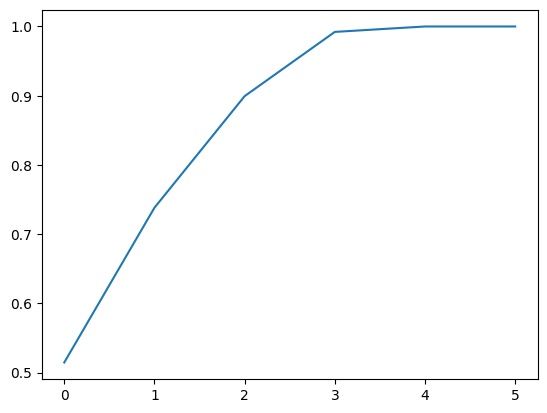

In [ ]:
plt.plot(np.cumsum(temp_pca.explained_variance_ratio_))

##Seasons

In [ ]:
data

min_temperature  max_temperature  avg_temperature  avg_wind_speed  \
0                 -6.7              0.6            -3.05            13.0   
1                 -1.1              1.7             0.29             9.5   
2                 -2.2              1.7            -0.25            16.0   
3                -11.7             -2.2            -6.94            14.0   
4                 -6.7             -1.1            -3.90            20.0   
...                ...              ...              ...             ...   
25562             -7.1             -1.4            -4.25            19.0   
25563             -1.4              4.6             1.60            17.0   
25564              2.0              9.5             5.75            17.0   
25565              8.2             13.1            10.64            16.5   
25566              2.7              9.7             6.19            17.0   

       precipitation  kmeans_dtw        date  year  month  day  agglomerative  \
0                0.0           2    1/1/1953  1953      1    1              1   
1                0.0           0    1/2/1953  1953      1    2              2   
2                0.0           0    1/3/1953  1953      1    3              2   
3                0.0           2    1/4/1953  1953      1    4              1   
4                0.5           2    1/5/1953  1953      1    5              1   
...              ...         ...         ...   ...    ...  ...            ...   
25562            0.0           2  12/27/2022  2022     12   27              1   
25563            0.0           0  12/28/2022  2022     12   28              2   
25564            0.0           0  12/29/2022  2022     12   29              2   
25565            5.8           0  12/30/2022  2022     12   30              2   
25566           18.6           0  12/31/2022  2022     12   31              2   

       kmedoids  seasons_kmeans  seasons_agglomerative  seasons_kmedoids  \
0             2               2                      1                 2   
1             2               0                      2                 2   
2             2               0                      2                 2   
3             2               2                      1                 2   
4             2               2                      1                 2   
...         ...             ...                    ...               ...   
25562         2               2                      1                 2   
25563         2               3                      3                 2   
25564         0               3                      3                 3   
25565         0               3                      3                 3   
25566         0               3                      3                 3   

       julian_day  avg_relative_humidity Kmeans_dtw_season_name  \
0               1                   82.5                 Winter   
1               2                   92.0                 Spring   
2               3                   91.5                 Spring   
3               4                   78.5                 Winter   
4               5                   85.5                 Winter   
...           ...                    ...                    ...   
25562         361                   71.0                 Winter   
25563         362                   71.5                   Fall   
25564         363                   77.5                   Fall   
25565         364                   89.0                   Fall   
25566         365                   93.5                   Fall   

      kmedoids_season_name agglomerative_season_name  
0                   Winter                    Winter  
1                   Winter                    Spring  
2                   Winter                    Spring  
3                   Winter                    Winter  
4                   Winter                    Winter  
...                    ...                       ...  
25562             

In [ ]:
weather_data = data

In [ ]:
print(mk.original_test(weather_data['max_temperature'].values, alpha=0.01))

Mann_Kendall_Test(trend='increasing', h=True, p=4.551026222543442e-11, z=6.584929217146415, Tau=0.02745647665801547, s=8973407.0, var_s=1857002179843.6667, slope=6.37726051109188e-05, intercept=12.484794788867125)


TypeError: Axes.bxp() got an unexpected keyword argument 'ci'

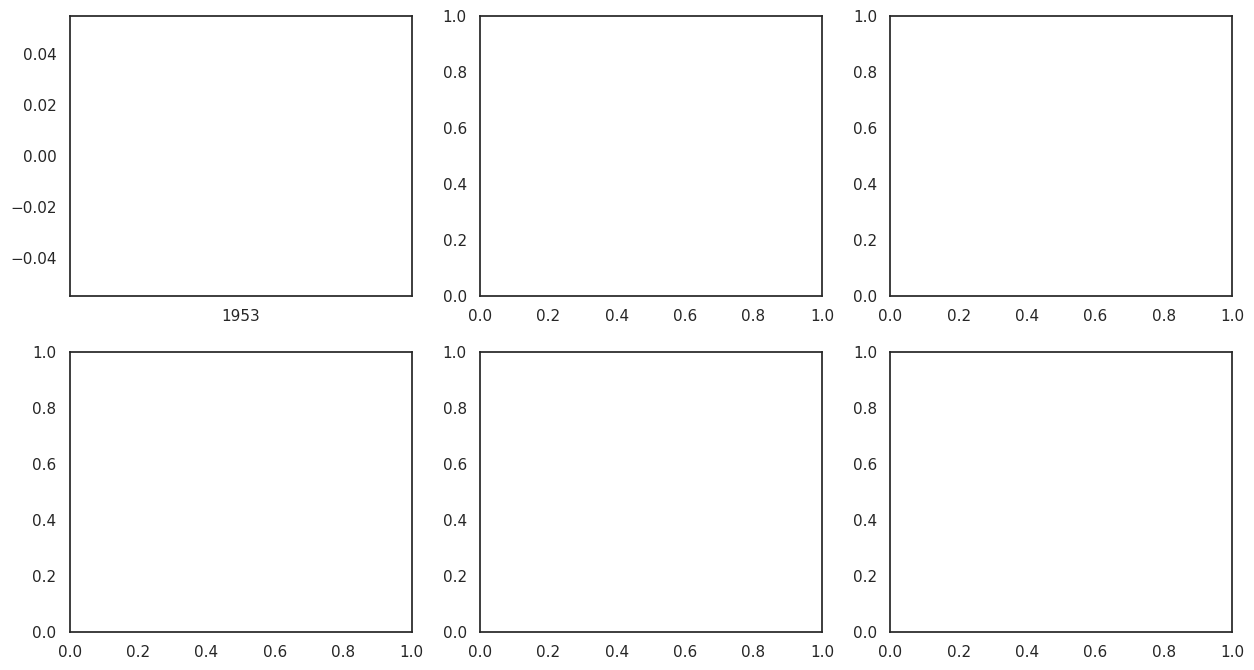

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(15,8))
g = sns.boxplot(data=weather_data, x="year",y="avg_temperature",ci=None,ax=ax1)
sns.regplot( data=weather_data,x='year',y= 'avg_temperature', scatter=False, ax=ax1)
g = sns.boxplot(data=weather_data, x="year",y="min_temperature",ci=None,ax=ax2)
sns.regplot( data=weather_data,x='year',y= 'min_temperature', scatter=False, ax=ax2)
g = sns.boxplot(data=weather_data, x="year",y="max_temperature",ci=None,ax=ax3)
sns.regplot( data=weather_data,x='year',y= 'max_temperature', scatter=False, ax=ax3)
g = sns.boxplot(data=weather_data, x="year",y="avg_relative_humidity",ci=None,ax=ax4)
sns.regplot( data=weather_data,x='year',y= 'avg_relative_humidity', scatter=False, ax=ax4)
g = sns.boxplot(data=weather_data, x="year",y="precipitation",ci=None,ax=ax5)
sns.regplot( data=weather_data,x='year',y= 'precipitation', scatter=False, ax=ax5)
g = sns.boxplot(data=weather_data, x="year",y="avg_wind_speed",ci=None,ax=ax6)
sns.regplot( data=weather_data,x='year',y= 'avg_wind_speed', scatter=False, ax=ax6)
ax1.set_xlabel("Year")
ax2.set_xlabel("Year")
ax3.set_xlabel("Year")
ax1.set_ylabel("Average Temperature")
ax2.set_ylabel("Minimum Temperature")
ax3.set_ylabel("Maximum Temperature")
ax4.set_xlabel("Year")
ax5.set_xlabel("Year")
ax6.set_xlabel("Year")
ax4.set_ylabel("Average Relative Humidity")
ax5.set_ylabel("Precipitation")
ax6.set_ylabel("Average Wind Speed")

In [ ]:
df = weather_data

avg temperature


<ipython-input-54-14022f724dfc>:22: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1953,2023,2)
<ipython-input-54-14022f724dfc>:44: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1953,2021,2)
<ipython-input-54-14022f724dfc>:66: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1953,2023,2)
<ipython-input-54-14022f724dfc>:87: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1953,2023,2)
<ipython-input-54-14

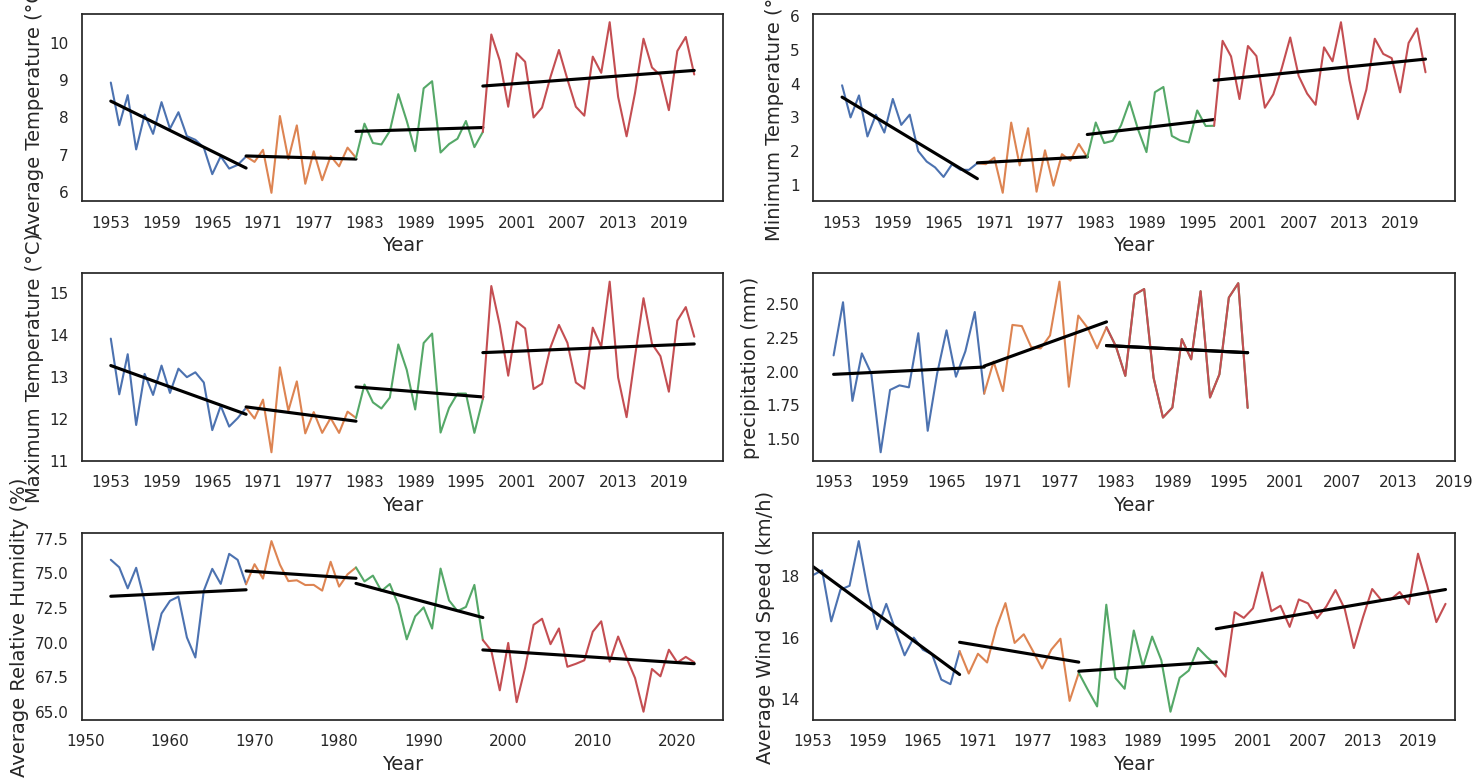

In [ ]:
print("avg temperature")
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(15,8))
d = df.loc[df['year'].astype('str')<'1970']

g = sns.lineplot(data=d, x="year",y="avg_temperature", ci=None, ax=ax1)
sns.regplot( data=d,x='year',y= 'avg_temperature', scatter=False, ax=ax1,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1968') & (df['year'].astype('str')<'1983')]

g = sns.lineplot(data=d, x="year",y="avg_temperature", ax=ax1,ci=None)
sns.regplot( data=d,x='year',y= 'avg_temperature', scatter=False, ax=ax1,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1981') & (df['year'].astype('str')<'1998')]

g = sns.lineplot(data=d, x="year",y="avg_temperature", ax=ax1,ci=None)
sns.regplot( data=d,x='year',y= 'avg_temperature', scatter=False, ax=ax1,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1996') & (df['year'].astype('str')<'2023')]

g = sns.lineplot(data=d, x="year",y="avg_temperature", ax=ax1,ci=None)
sns.regplot( data=d,x='year',y= 'avg_temperature', scatter=False, ax=ax1,ci=None,color='black')
plt.tight_layout()
ax1.set_ylabel("Average Temperature (°C)", fontsize=14)
ax1.set_xlabel("Year", fontsize=14)
plt.xlim(1953,2023,2)
ax1.xaxis.set_ticks(np.arange(1953, 2023, 6))

d = df.loc[df['year'].astype('str')<'1970']
g = sns.lineplot(data=d, x="year",y="min_temperature", ci=None, ax=ax2)

sns.regplot( data=d,x='year',y= 'min_temperature', scatter=False, ax=ax2,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1968') & (df['year'].astype('str')<'1983')]

g = sns.lineplot(data=d, x="year",y="min_temperature", ax=ax2,ci=None)
sns.regplot( data=d,x='year',y= 'min_temperature', scatter=False, ax=ax2,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1981') & (df['year'].astype('str')<'1998')]

g = sns.lineplot(data=d, x="year",y="min_temperature", ax=ax2,ci=None)
sns.regplot( data=d,x='year',y= 'min_temperature', scatter=False, ax=ax2,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1996') & (df['year'].astype('str')<'2023')]

g = sns.lineplot(data=d, x="year",y="min_temperature", ax=ax2,ci=None)
sns.regplot( data=d,x='year',y= 'min_temperature', scatter=False, ax=ax2,ci=None,color='black')
plt.tight_layout()
ax2.set_ylabel("Minimum Temperature (°C)", fontsize=14)
ax2.set_xlabel("Year", fontsize=14)
plt.xlim(1953,2021,2)

ax2.xaxis.set_ticks(np.arange(1953, 2023, 6))
d = df.loc[df['year'].astype('str')<'1970']

g = sns.lineplot(data=d, x="year",y="max_temperature", ci=None, ax=ax3)
sns.regplot( data=d,x='year',y= 'max_temperature', scatter=False, ax=ax3,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1968') & (df['year'].astype('str')<'1983')]

g = sns.lineplot(data=d, x="year",y="max_temperature", ax=ax3,ci=None)
sns.regplot( data=d,x='year',y= 'max_temperature', scatter=False, ax=ax3,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1981') & (df['year'].astype('str')<'1998')]

g = sns.lineplot(data=d, x="year",y="max_temperature", ax=ax3,ci=None)
sns.regplot( data=d,x='year',y= 'max_temperature', scatter=False, ax=ax3,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1996') & (df['year'].astype('str')<'2023')]

g = sns.lineplot(data=d, x="year",y="max_temperature", ax=ax3,ci=None)
sns.regplot( data=d,x='year',y= 'max_temperature', scatter=False, ax=ax3,ci=None,color='black')
plt.tight_layout()
ax3.set_ylabel("Maximum Temperature (°C)", fontsize=14)
ax3.set_xlabel("Year", fontsize=14)
plt.xlim(1953,2023,2)
ax3.xaxis.set_ticks(np.arange(1953, 2023, 6))

d = df.loc[df['year'].astype('str')<'1970']

g = sns.lineplot(data=d, x="year",y="precipitation", ci=None, ax=ax4)
sns.regplot( data=d,x='year',y= 'precipitation', scatter=False, ax=ax4,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1968') & (df['year'].astype('str')<'1983')]

g = sns.lineplot(data=d, x="year",y="precipitation", ax=ax4,ci=None)
sns.regplot( data=d,x='year',y= 'precipitation', scatter=False, ax=ax4,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1981') & (df['year'].astype('str')<'1998')]

g = sns.lineplot(data=d, x="year",y="precipitation", ax=ax4,ci=None)
sns.regplot( data=d,x='year',y= 'precipitation', scatter=False, ax=ax4,ci=None,color='black')

g = sns.lineplot(data=d, x="year",y="precipitation", ax=ax4,ci=None)
sns.regplot( data=d,x='year',y= 'precipitation', scatter=False, ax=ax4,ci=None,color='black')
plt.tight_layout()
ax4.set_ylabel("precipitation (mm)", fontsize=14)
ax4.set_xlabel("Year", fontsize=14)
plt.xlim(1953,2023,2)
ax4.xaxis.set_ticks(np.arange(1953, 2023, 6))


d = df.loc[df['year'].astype('str')<'1970']

g = sns.lineplot(data=d, x="year",y="avg_relative_humidity", ci=None, ax=ax5)
sns.regplot( data=d,x='year',y= 'avg_relative_humidity', scatter=False, ax=ax5,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1968') & (df['year'].astype('str')<'1983')]

g = sns.lineplot(data=d, x="year",y="avg_relative_humidity", ax=ax5,ci=None)
sns.regplot( data=d,x='year',y= 'avg_relative_humidity', scatter=False, ax=ax5,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1981') & (df['year'].astype('str')<'1998')]

g = sns.lineplot(data=d, x="year",y="avg_relative_humidity", ax=ax5,ci=None)
sns.regplot( data=d,x='year',y= 'avg_relative_humidity', scatter=False, ax=ax5,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1996') & (df['year'].astype('str')<'2023')]

g = sns.lineplot(data=d, x="year",y="avg_relative_humidity", ax=ax5,ci=None)
sns.regplot( data=d,x='year',y= 'avg_relative_humidity', scatter=False, ax=ax5,ci=None,color='black')
plt.tight_layout()
ax5.set_ylabel("Average Relative Humidity (%)", fontsize=14)
ax5.set_xlabel("Year", fontsize=14)
plt.xlim(1953,2023,2)
ax1.xaxis.set_ticks(np.arange(1953, 2023, 6))

d = df.loc[df['year'].astype('str')<'1970']

g = sns.lineplot(data=d, x="year",y="avg_wind_speed", ci=None, ax=ax6)
sns.regplot( data=d,x='year',y= 'avg_wind_speed', scatter=False, ax=ax6,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1968') & (df['year'].astype('str')<'1983')]

g = sns.lineplot(data=d, x="year",y="avg_wind_speed", ax=ax6,ci=None)
sns.regplot( data=d,x='year',y= 'avg_wind_speed', scatter=False, ax=ax6,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1981') & (df['year'].astype('str')<'1998')]

g = sns.lineplot(data=d, x="year",y="avg_wind_speed", ax=ax6,ci=None)
sns.regplot( data=d,x='year',y= 'avg_wind_speed', scatter=False, ax=ax6,ci=None,color='black')
d = df.loc[(df['year'].astype('str')>'1996') & (df['year'].astype('str')<'2023')]

g = sns.lineplot(data=d, x="year",y="avg_wind_speed", ax=ax6,ci=None)
sns.regplot( data=d,x='year',y= 'avg_wind_speed', scatter=False, ax=ax6,ci=None,color='black')
plt.tight_layout()
ax6.set_ylabel("Average Wind Speed (km/h)", fontsize=14)
ax6.set_xlabel("Year", fontsize=14)
plt.xlim(1953,2023,2)
ax6.xaxis.set_ticks(np.arange(1953, 2023, 6))
fig.tight_layout()

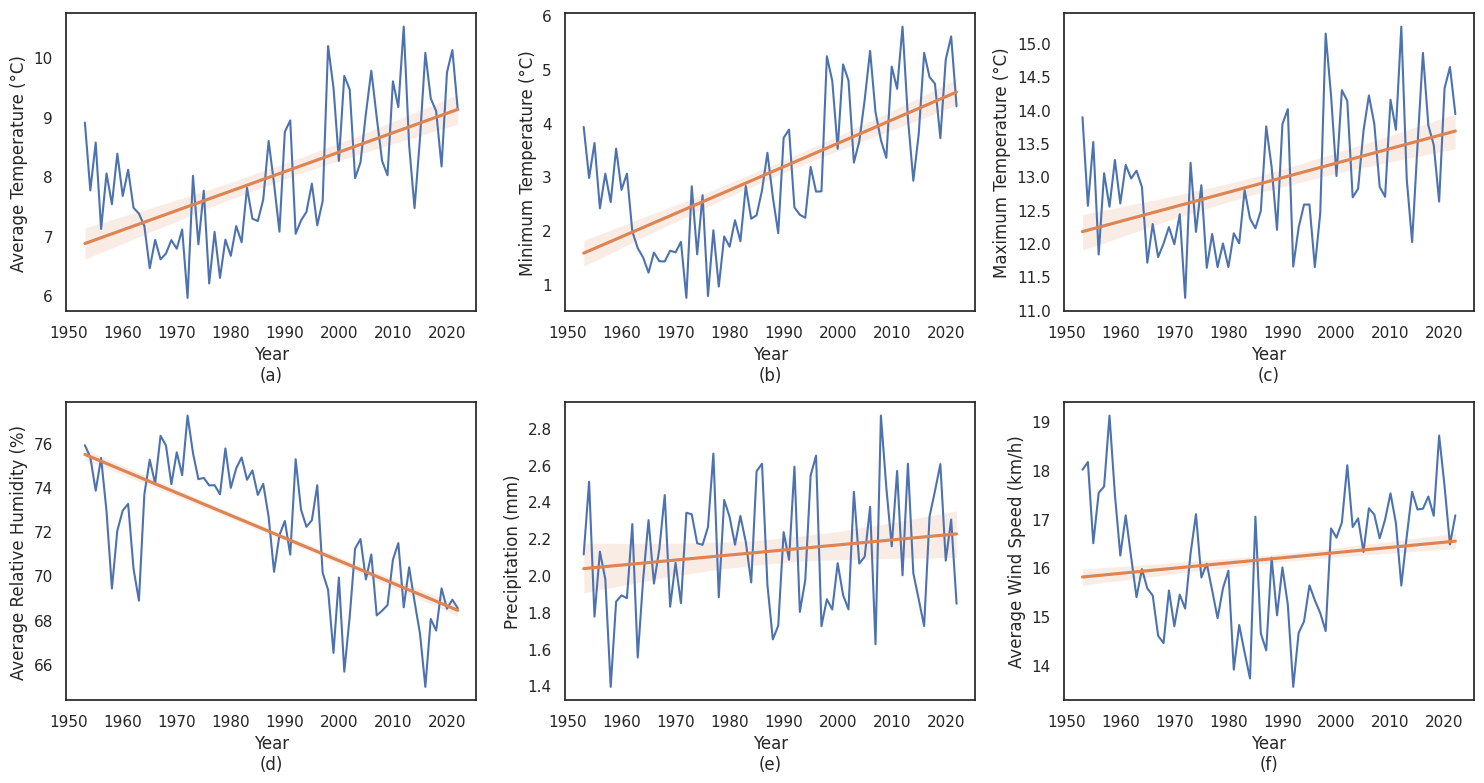

In [ ]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(15,8))
g = sns.lineplot(data=weather_data, x="year",y="avg_temperature",ci=None,ax=ax1)
sns.regplot( data=weather_data,x='year',y= 'avg_temperature', scatter=False, ax=ax1)
g = sns.lineplot(data=weather_data, x="year",y="min_temperature",ci=None,ax=ax2)
sns.regplot( data=weather_data,x='year',y= 'min_temperature', scatter=False, ax=ax2)
g = sns.lineplot(data=weather_data, x="year",y="max_temperature",ci=None,ax=ax3)
sns.regplot( data=weather_data,x='year',y= 'max_temperature', scatter=False, ax=ax3)
g = sns.lineplot(data=weather_data, x="year",y="avg_relative_humidity",ci=None,ax=ax4)
sns.regplot( data=weather_data,x='year',y= 'avg_relative_humidity', scatter=False, ax=ax4)
g = sns.lineplot(data=weather_data, x="year",y="precipitation",ci=None,ax=ax5)
sns.regplot( data=weather_data,x='year',y= 'precipitation', scatter=False, ax=ax5)
g = sns.lineplot(data=weather_data, x="year",y="avg_wind_speed",ci=None,ax=ax6)
sns.regplot( data=weather_data,x='year',y= 'avg_wind_speed', scatter=False, ax=ax6)
ax1.set_xlabel("Year"+"\n"
               +"(a)")
ax2.set_xlabel("Year"+"\n"
               +"(b)")
ax3.set_xlabel("Year"+"\n"
               +"(c)")
ax4.set_xlabel("Year"+"\n"
               +"(d)")
ax5.set_xlabel("Year"+"\n"
               +"(e)")
ax6.set_xlabel("Year"+"\n"
               +"(f)")
ax1.set_ylabel("Average Temperature (°C)")
ax2.set_ylabel("Minimum Temperature (°C)")
ax3.set_ylabel("Maximum Temperature (°C)")
ax4.set_ylabel("Average Relative Humidity (%)")
ax5.set_ylabel("Precipitation (mm)")
ax6.set_ylabel("Average Wind Speed (km/h)")
fig.tight_layout()

In [ ]:
print(mk.original_test(weather_data['avg_temperature'].values, alpha=0.01))

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=10.208522877892987, Tau=0.04256579757258854, s=13911480.0, var_s=1857038023678.6667, slope=9.497105643994218e-05, intercept=7.08598498552822)


In [ ]:
print(mk.original_test(weather_data['min_temperature'].values, alpha=0.01))
print(mk.original_test(weather_data['max_temperature'].values, alpha=0.01))
print(mk.original_test(weather_data['avg_relative_humidity'].values, alpha=0.01))
print(mk.original_test(weather_data['precipitation'].values, alpha=0.01))
print(mk.original_test(weather_data['avg_wind_speed'].values, alpha=0.01))

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=13.853298058304867, Tau=0.057762425694441955, s=18878087.0, var_s=1856989994642.3333, slope=0.0001215066828675577, intercept=1.64678007290401)
Mann_Kendall_Test(trend='increasing', h=True, p=4.551026222543442e-11, z=6.584929217146415, Tau=0.02745647665801547, s=8973407.0, var_s=1857002179843.6667, slope=6.37726051109188e-05, intercept=12.484794788867125)
Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-29.605968925480603, Tau=-0.12343383976623357, s=-40341013.0, var_s=1856671280302.3333, slope=-0.0002743735138101335, intercept=76.00731662703494)
Mann_Kendall_Test(trend='increasing', h=True, p=1.4429748437017054e-05, z=4.337218008323119, Tau=0.01592634123402364, s=5205094.0, var_s=1440238719597.3333, slope=0.0, intercept=0.0)
Mann_Kendall_Test(trend='increasing', h=True, p=2.5456634356046948e-08, z=5.570118358478829, Tau=0.02321498457998488, s=7587190.0, var_s=1855380373562.6667, slope=0.0, intercept=15.0)


##namin of seasons

In [ ]:

conditions = [
    (data['seasons_kmeans']==0),
    (data['seasons_kmeans']==1),
    (data['seasons_kmeans']==2), (data['seasons_kmeans']==3)]
choices = ['Spring','Summer','Winter','Fall']
data['Kmeans_dtw_season_name'] = np.select(conditions, choices, default='black')


In [ ]:

conditions = [
    (data['seasons_kmedoids']==0),
    (data['seasons_kmedoids']==1),
    (data['seasons_kmedoids']==2), (data['seasons_kmedoids']==3)]
choices = ['Spring','Summer','Winter','Fall']
data['kmedoids_season_name'] = np.select(conditions, choices, default='black')

In [ ]:

conditions = [
    (data['seasons_agglomerative']==0),
    (data['seasons_agglomerative']==1),
    (data['seasons_agglomerative']==2), (data['seasons_agglomerative']==3)]
choices = ['Summer','Winter','Spring','Fall']
data['agglomerative_season_name'] = np.select(conditions, choices, default='black')

Text(0.5, 0, 'Average Temperature\n(c)')

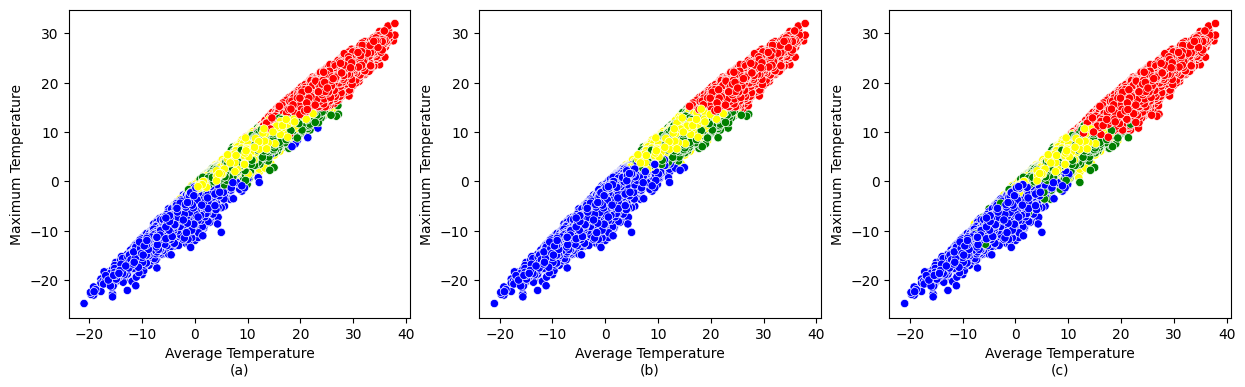

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
sns.scatterplot(data=data, x = 'max_temperature', y='avg_temperature',hue = 'Kmeans_dtw_season_name',palette=['blue','green','red','yellow'],ax=ax1)
sns.scatterplot(data=data, x = 'max_temperature', y='avg_temperature',hue = 'kmedoids_season_name',palette=['blue','green','red','yellow'],ax=ax2)
sns.scatterplot(data=data, x = 'max_temperature', y='avg_temperature',hue = 'agglomerative_season_name',palette=['blue','green','red','yellow'],ax=ax3)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax1.set_ylabel("Maximum Temperature")
ax2.set_ylabel("Maximum Temperature")
ax3.set_ylabel("Maximum Temperature")
ax1.set_xlabel("Average Temperature"+"\n"
               +"(a)")
ax2.set_xlabel("Average Temperature"+"\n"
               +"(b)")
ax3.set_xlabel("Average Temperature"+"\n"
               +"(c)")

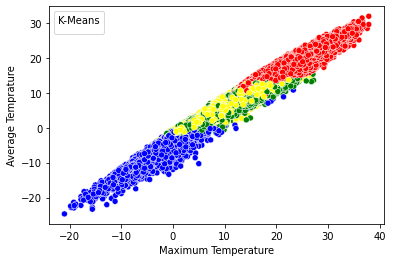

In [ ]:
fig = sns.scatterplot(data=data, x = 'max_temperature', y='avg_temperature',hue = 'Kmeans_dtw_season_name',palette=['blue','green','red','yellow'])
plt.legend(title='K-Means',loc='upper left', labels=[])
plt.xlabel('Maximum Temperature')
plt.ylabel('Average Temprature')
plt.show()

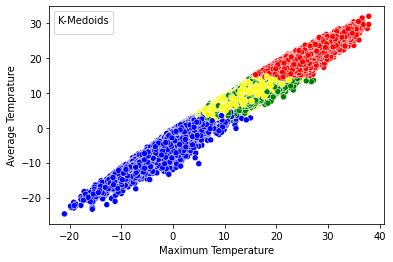

In [ ]:
fig = sns.scatterplot(data=data, x = 'max_temperature', y='avg_temperature',hue = 'kmedoids_season_name',palette=['blue','green','red','yellow'])
plt.legend(title='K-Medoids',loc='upper left', labels=[])
plt.xlabel('Maximum Temperature')
plt.ylabel('Average Temprature')
plt.show()

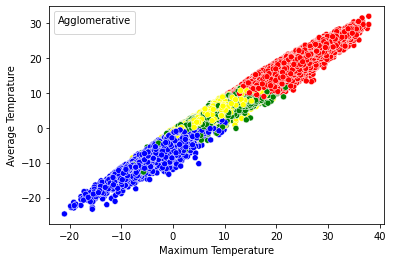

In [ ]:
fig = sns.scatterplot(data=data, x = 'max_temperature', y='avg_temperature',hue = 'agglomerative_season_name',palette=['blue','green','red','yellow'])
plt.legend(title='Agglomerative',loc='upper left', labels=[])
plt.xlabel('Maximum Temperature')
plt.ylabel('Average Temprature')
plt.show()

In [ ]:
julian_day = range(0,365)

In [ ]:
julian_day

range(0, 365)

Text(0, 0.5, 'Average Temperature')

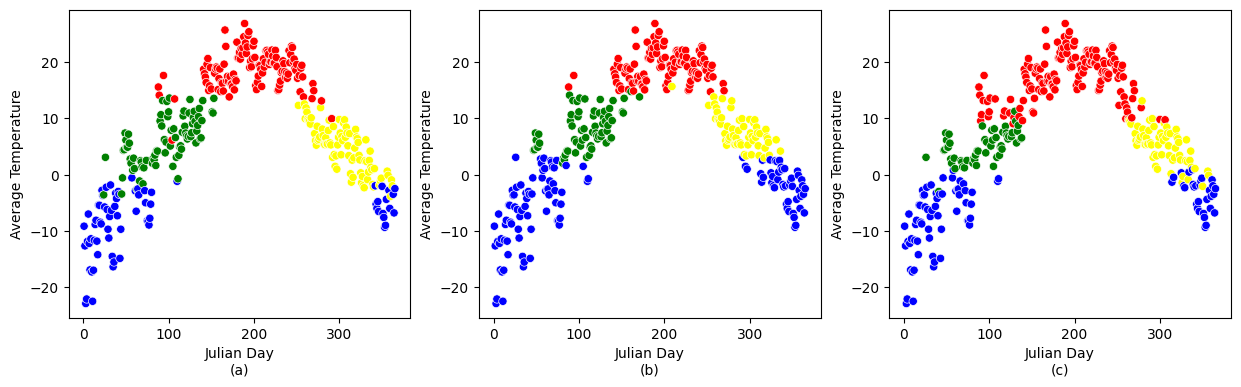

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
sns.scatterplot(data=data.loc[data['year']==1981], x = 'julian_day', y='avg_temperature',hue = 'Kmeans_dtw_season_name',palette=['blue','green','red','yellow'],ax=ax1)
sns.scatterplot(data=data.loc[data['year']==1981], x = 'julian_day', y='avg_temperature',hue = 'kmedoids_season_name',palette=['blue','green','red','yellow'],ax=ax2)
sns.scatterplot(data=data.loc[data['year']==1981], x = 'julian_day', y='avg_temperature',hue = 'agglomerative_season_name',palette=['blue','green','red','yellow'],ax=ax3)
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax1.set_xlabel("Julian Day"+"\n"
               +"(a)")
ax2.set_xlabel("Julian Day"+"\n"
               +"(b)")
ax3.set_xlabel("Julian Day"+"\n"
               +"(c)")
ax1.set_ylabel("Average Temperature")
ax2.set_ylabel("Average Temperature")
ax3.set_ylabel("Average Temperature")

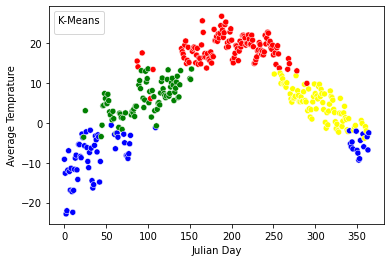

In [ ]:
fig = sns.scatterplot(data=data.loc[data['year']==1981], x = julian_day, y='avg_temperature',hue = 'Kmeans_dtw_season_name',palette=['blue','green','red','yellow'])
plt.legend(title='K-Means',loc='upper left', labels=[])
plt.xlabel('Julian Day')
plt.ylabel('Average Temprature')
plt.show()

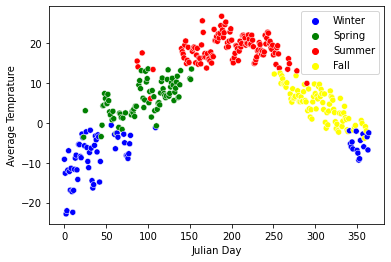

In [ ]:
fig = sns.scatterplot(data=data.loc[data['year']==1981], x = julian_day, y='avg_temperature',hue = 'Kmeans_dtw_season_name',palette=['blue','green','red','yellow'])
plt.legend(title='K-Means',loc='upper left', labels=[])
plt.xlabel('Julian Day')
plt.ylabel('Average Temprature')
plt.legend()
plt.show()

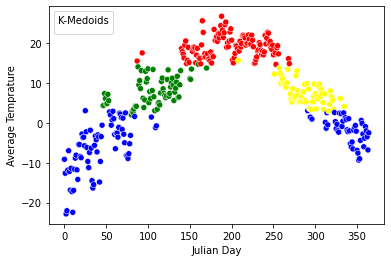

In [ ]:
fig = sns.scatterplot(data=data.loc[data['year']==1981], x = julian_day, y='avg_temperature',hue = 'kmedoids_season_name',palette=['blue','green','red','yellow'])
plt.legend(title='K-Medoids',loc='upper left', labels=[])
plt.xlabel('Julian Day')
plt.ylabel('Average Temprature')

plt.show()

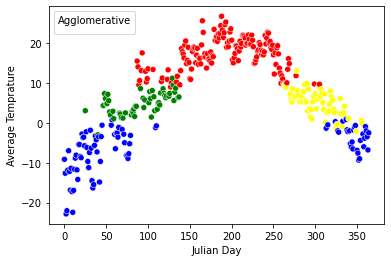

In [ ]:
fig = sns.scatterplot(data=data.loc[data['year']==1981], x = julian_day, y='avg_temperature',hue = 'agglomerative_season_name',palette=['blue','green','red','yellow'])
plt.legend(title='Agglomerative',loc='upper left', labels=[])
plt.xlabel('Julian Day')
plt.ylabel('Average Temprature')
plt.show()

In [ ]:
temp = data.loc[data['year'].astype(int)%3==0]

In [ ]:
len(temp)

8766

In [ ]:
c = temp.year.unique()

In [ ]:
c

array([1953, 1956, 1959, 1962, 1965, 1968, 1971, 1974, 1977, 1980, 1983,
       1986, 1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016,
       2019, 2022])

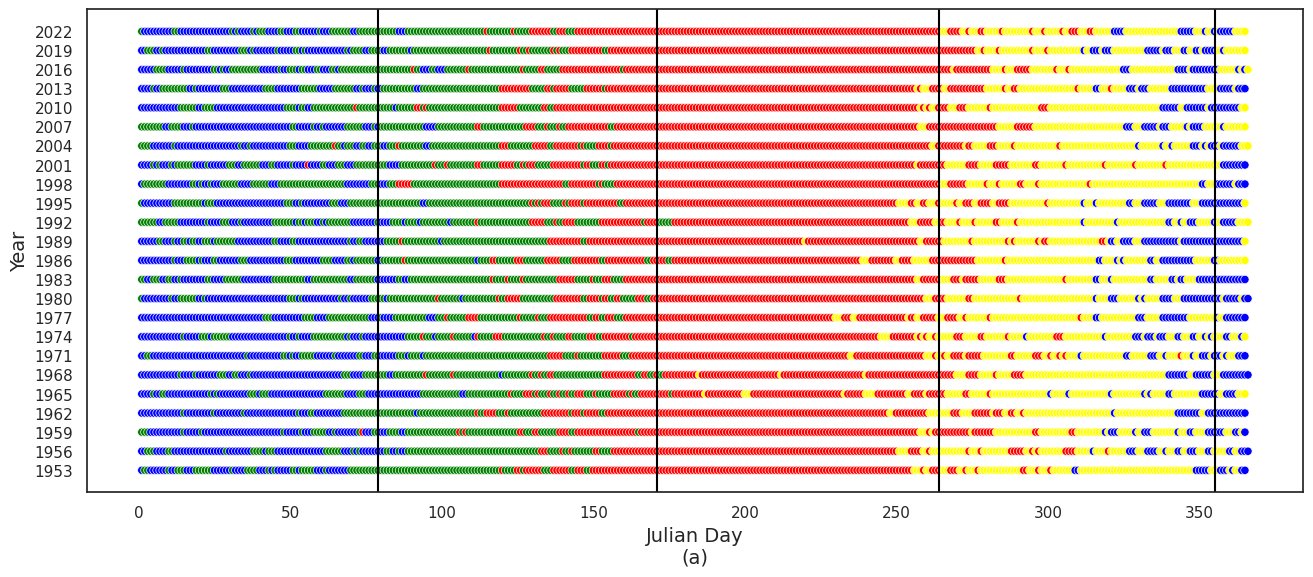

In [ ]:
sns.set(rc={'figure.figsize':(15.7,6.27)})
sns.set_theme(style='white')
g = sns.scatterplot(data=temp,x = temp['julian_day'],y = temp['year'],hue = 'Kmeans_dtw_season_name',palette=['blue','green','red','yellow'])
plt.axvline(x=79,color='black')
plt.axvline(x=171,color='black')
plt.axvline(x=264,color='black')
plt.axvline(x=355, color='black')
g.set_yticks(c)
g.set_xlabel("Julian Day"+"\n"
               +"(a)",fontsize=14.0,)
g.set_ylabel("Year",fontsize=14.0,)
g.get_legend().remove()

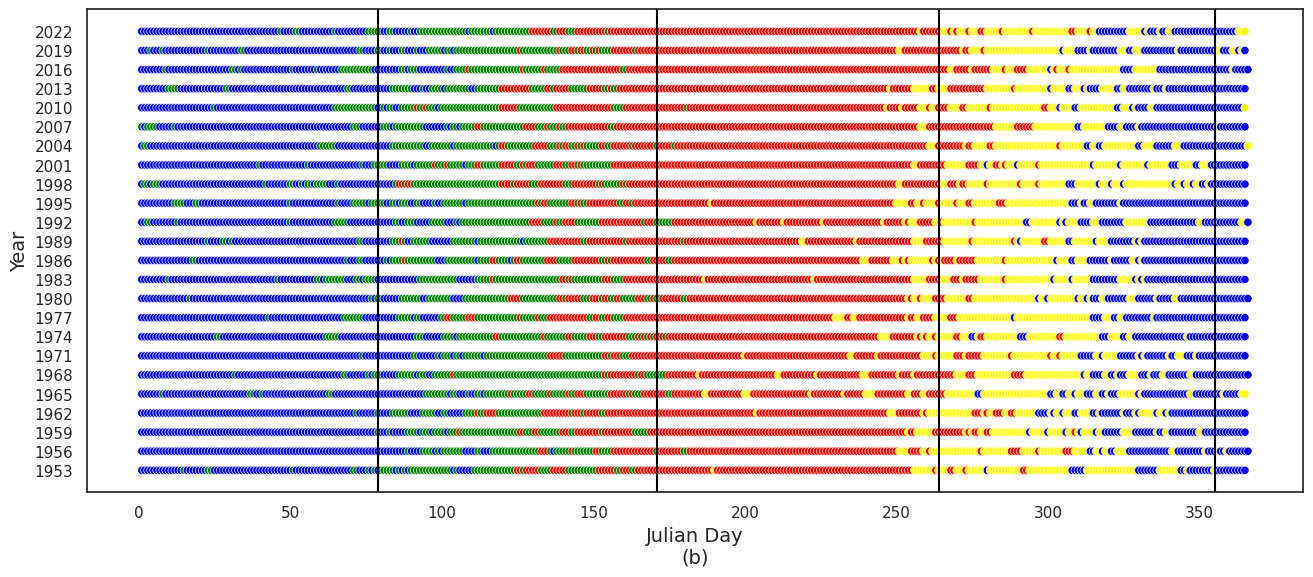

In [ ]:
sns.set(rc={'figure.figsize':(15.7,6.27)})
sns.set_theme(style='white')
g = sns.scatterplot(data=temp,x = temp['julian_day'],y = temp['year'],hue = 'kmedoids_season_name',palette=['blue','green','red','yellow'])
plt.axvline(x=79,color='black')
plt.axvline(x=171,color='black')
plt.axvline(x=264,color='black')
plt.axvline(x=355, color='black')
g.set_yticks(c)
g.set_xlabel("Julian Day"+"\n"
               +"(b)",fontsize=14.0,)
g.set_ylabel("Year",fontsize=14.0,)
g.get_legend().remove()

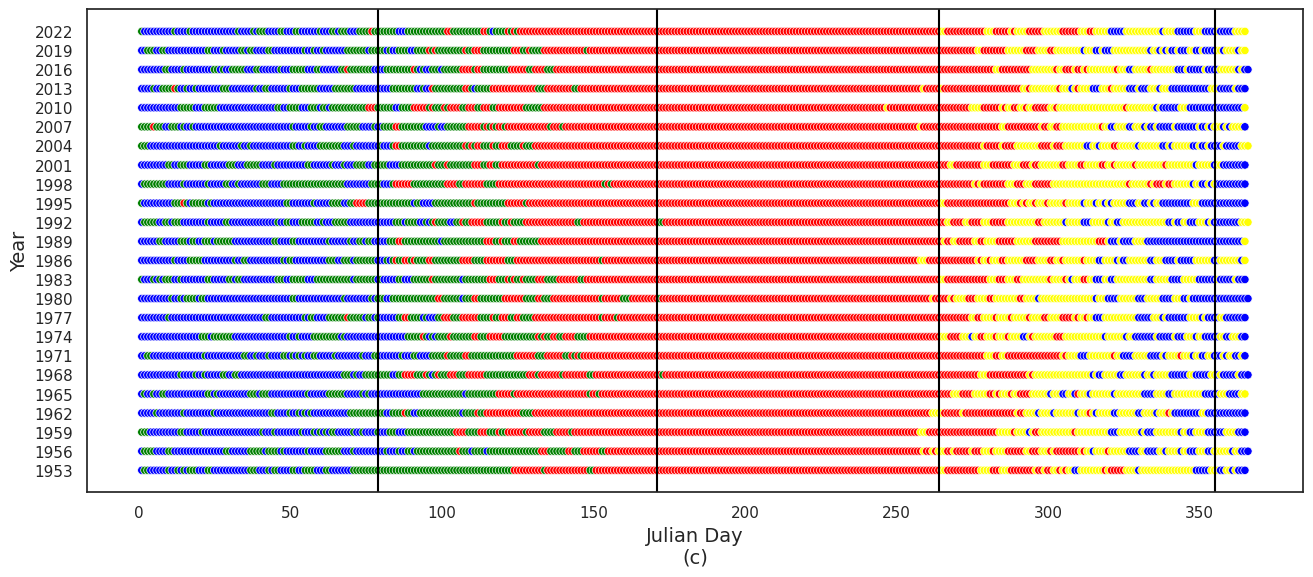

In [ ]:

sns.set(rc={'figure.figsize':(15.7,6.27)})
sns.set_theme(style='white')
g = sns.scatterplot(data=temp,x = temp['julian_day'],y = temp['year'],hue = 'agglomerative_season_name',palette=['blue','green','red','yellow'])
plt.axvline(x=79,color='black')
plt.axvline(x=171,color='black')
plt.axvline(x=264,color='black')
plt.axvline(x=355, color='black')
g.set_yticks(c)
g.set_xlabel("Julian Day"+"\n"
               +"(c)",fontsize=14.0,)
g.set_ylabel("Year",fontsize=14.0,)
g.get_legend().remove()

In [ ]:
fig = px.scatter(temp, x = 'julian_day', y='year', opacity = 0.8, size_max=30,hover_name='date',color='Kmeans_dtw_season_name',labels={"Kmeans_dtw_season_name":"K-Means"})
fig.add_vline(x=79)
fig.add_vline(x=171)
fig.add_vline(x=264)
fig.add_vline(x=355)
fig.show(renderer="colab")

In [ ]:
fig = px.scatter(temp, x = 'julian_day', y='year', opacity = 0.8, size_max=30,hover_name='date',color='kmedoids_season_name',labels={"kmedoids_season_name":"K-Medoids"})
fig.add_vline(x=79)
fig.add_vline(x=171)
fig.add_vline(x=264)
fig.add_vline(x=355)
fig.show(renderer="colab")

In [ ]:
fig = px.scatter(temp, x = 'julian_day', y='year', opacity = 0.8, size_max=30,hover_name='date',color='agglomerative_season_name',labels={"agglomerative_season_name":"Agglomerative"})
fig.add_vline(x=79)
fig.add_vline(x=171)
fig.add_vline(x=264)
fig.add_vline(x=355)
fig.show(renderer="colab")

Text(0, 0.5, 'average temperature')

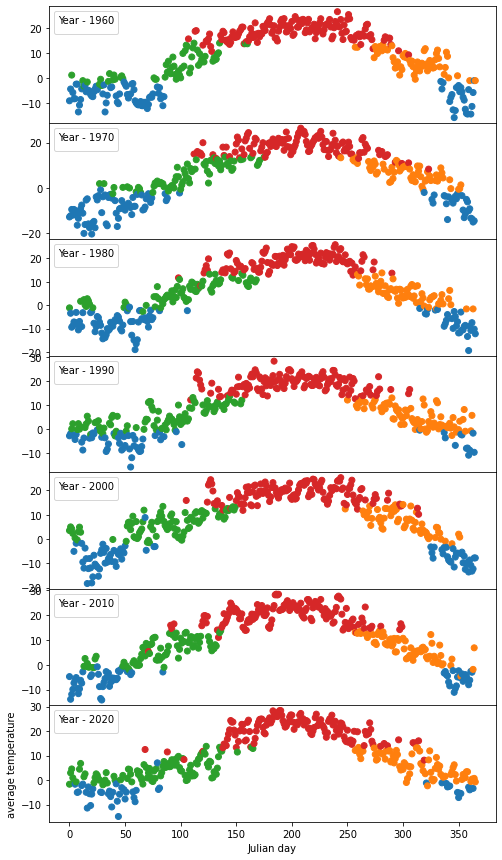

In [ ]:
fig, axs = plt.subplots(7,1, figsize=(8, 15), sharex=True, sharey=False, gridspec_kw={'hspace': 0.0,})
colors = {'Winter':'tab:blue', 'Summer':'tab:red', 'Spring':'tab:green', 'Fall':'tab:orange'}
for i, ax in enumerate(axs.flat):
  d = temp.loc[temp['year']==c[i]]
  x = range(0,len(d))
  ax.scatter(x,d['avg_temperature'],c = d['Kmeans_dtw_season_name'].map(colors))
  ax.legend(title=f'Year - {c[i]}',loc='upper left', labels=[])
plt.xlabel("Julian day")
plt.ylabel("average temperature")

In [ ]:
data

min_temperature  max_temperature  avg_temperature  avg_wind_speed  \
0                 -6.7              0.6            -3.05            13.0   
1                 -1.1              1.7             0.29             9.5   
2                 -2.2              1.7            -0.25            16.0   
3                -11.7             -2.2            -6.94            14.0   
4                 -6.7             -1.1            -3.90            20.0   
...                ...              ...              ...             ...   
25562             -7.1             -1.4            -4.25            19.0   
25563             -1.4              4.6             1.60            17.0   
25564              2.0              9.5             5.75            17.0   
25565              8.2             13.1            10.64            16.5   
25566              2.7              9.7             6.19            17.0   

       precipitation  kmeans_dtw        date  year  month  day  agglomerative  \
0                0.0           2    1/1/1953  1953      1    1              1   
1                0.0           0    1/2/1953  1953      1    2              2   
2                0.0           0    1/3/1953  1953      1    3              2   
3                0.0           2    1/4/1953  1953      1    4              1   
4                0.5           2    1/5/1953  1953      1    5              1   
...              ...         ...         ...   ...    ...  ...            ...   
25562            0.0           2  12/27/2022  2022     12   27              1   
25563            0.0           0  12/28/2022  2022     12   28              2   
25564            0.0           0  12/29/2022  2022     12   29              2   
25565            5.8           0  12/30/2022  2022     12   30              2   
25566           18.6           0  12/31/2022  2022     12   31              2   

       kmedoids  seasons_kmeans  seasons_agglomerative  seasons_kmedoids  \
0             2               2                      1                 2   
1             2               0                      2                 2   
2             2               0                      2                 2   
3             2               2                      1                 2   
4             2               2                      1                 2   
...         ...             ...                    ...               ...   
25562         2               2                      1                 2   
25563         2               3                      3                 2   
25564         0               3                      3                 3   
25565         0               3                      3                 3   
25566         0               3                      3                 3   

       julian_day  avg_relative_humidity Kmeans_dtw_season_name  \
0               1                   82.5                 Winter   
1               2                   92.0                 Spring   
2               3                   91.5                 Spring   
3               4                   78.5                 Winter   
4               5                   85.5                 Winter   
...           ...                    ...                    ...   
25562         361                   71.0                 Winter   
25563         362                   71.5                   Fall   
25564         363                   77.5                   Fall   
25565         364                   89.0                   Fall   
25566         365                   93.5                   Fall   

      kmedoids_season_name agglomerative_season_name  
0                   Winter                    Winter  
1                   Winter                    Spring  
2                   Winter                    Spring  
3                   Winter                    Winter  
4                   Winter                    Winter  
...                    ...                       ...  
25562             

In [ ]:
df = data.groupby(['year','Kmeans_dtw_season_name'])['Kmeans_dtw_season_name'].count().reset_index(name="count")

In [ ]:
df

year Kmeans_dtw_season_name  count
0    1953                   Fall     84
1    1953                 Spring     89
2    1953                 Summer    137
3    1953                 Winter     55
4    1954                   Fall     68
..    ...                    ...    ...
275  2021                 Winter     53
276  2022                   Fall     69
277  2022                 Spring     78
278  2022                 Summer    148
279  2022                 Winter     70

[280 rows x 3 columns]

Text(0, 0.5, '')

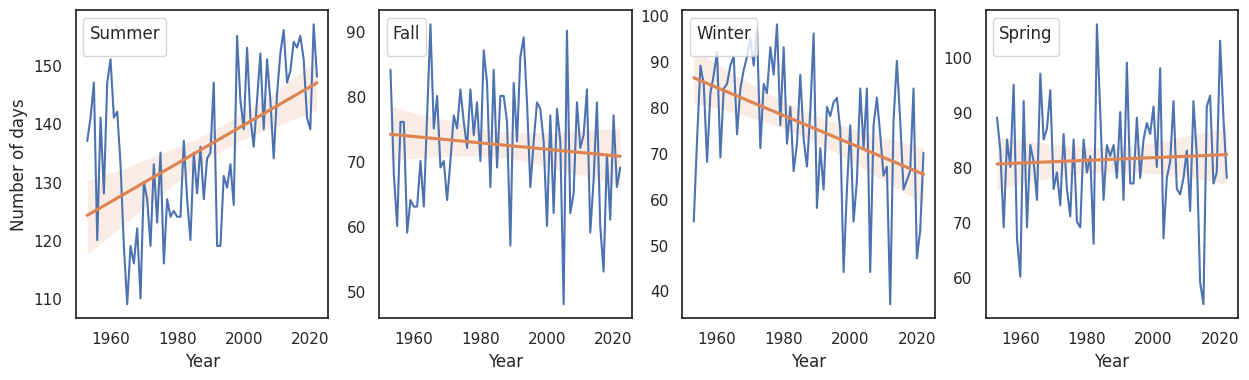

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,4))
g = sns.lineplot(data=df.loc[df['Kmeans_dtw_season_name']=='Summer'], x="year",y="count",ci=None, ax=ax1)
sns.regplot( data=df.loc[df['Kmeans_dtw_season_name']=='Summer'],x='year',y= 'count', scatter=False, ax=ax1)
g = sns.lineplot(data=df.loc[df['Kmeans_dtw_season_name']=='Fall'], x="year",y="count",ci=None, ax=ax2)
sns.regplot( data=df.loc[df['Kmeans_dtw_season_name']=='Fall'],x='year',y= 'count', scatter=False, ax=ax2)
g = sns.lineplot(data=df.loc[df['Kmeans_dtw_season_name']=='Winter'], x="year",y="count",ci=None, ax=ax3)
sns.regplot( data=df.loc[df['Kmeans_dtw_season_name']=='Winter'],x='year',y= 'count', scatter=False, ax=ax3)
g = sns.lineplot(data=df.loc[df['Kmeans_dtw_season_name']=='Spring'], x="year",y="count",ci=None, ax=ax4)
sns.regplot( data=df.loc[df['Kmeans_dtw_season_name']=='Spring'],x='year',y= 'count', scatter=False, ax=ax4)
ax1.legend(title='Summer',loc='upper left')
ax2.legend(title='Fall',loc='upper left', labels=[])
ax3.legend(title='Winter',loc='upper left', labels=[])
ax4.legend(title='Spring',loc='upper left', labels=[])
ax1.set_xlabel("Year")
ax2.set_xlabel("Year")
ax3.set_xlabel("Year")
ax4.set_xlabel("Year")
ax1.set_ylabel("Number of days")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax4.set_ylabel("")

In [ ]:
print(mk.original_test(df.loc[df['Kmeans_dtw_season_name']=='Summer']['count'].values, alpha=0.1))
print(mk.original_test(df.loc[df['Kmeans_dtw_season_name']=='Fall']['count'].values, alpha=0.1))
print(mk.original_test(df.loc[df['Kmeans_dtw_season_name']=='Winter']['count'].values, alpha=0.1))
print(mk.original_test(df.loc[df['Kmeans_dtw_season_name']=='Spring']['count'].values, alpha=0.1))

Mann_Kendall_Test(trend='increasing', h=True, p=1.6197607950463322e-06, z=4.795862850496168, Tau=0.3917184265010352, s=946.0, var_s=38826.666666666664, slope=0.4, intercept=121.7)
Mann_Kendall_Test(trend='no trend', h=False, p=0.5663207722647434, z=-0.5734784706305214, Tau=-0.04720496894409938, s=-114.0, var_s=38826.0, slope=-0.03636363636363636, intercept=74.25454545454545)
Mann_Kendall_Test(trend='decreasing', h=True, p=0.00016705975595621148, z=-3.764234951664578, Tau=-0.3076604554865424, s=-743.0, var_s=38855.666666666664, slope=-0.2857142857142857, intercept=86.85714285714286)
Mann_Kendall_Test(trend='no trend', h=False, p=0.6406081158520962, z=0.4668487202138832, Tau=0.03850931677018633, s=93.0, var_s=38835.0, slope=0.03333333333333333, intercept=80.35)


In [ ]:
df = data.groupby(['year','kmedoids_season_name'])['kmedoids_season_name'].count().reset_index(name="count")

In [ ]:
df

year kmedoids_season_name  count
0    1953                 Fall     72
1    1953               Spring     63
2    1953               Summer    117
3    1953               Winter    113
4    1954                 Fall     54
..    ...                  ...    ...
275  2021               Winter    110
276  2022                 Fall     55
277  2022               Spring     53
278  2022               Summer    138
279  2022               Winter    119

[280 rows x 3 columns]

Text(0, 0.5, '')

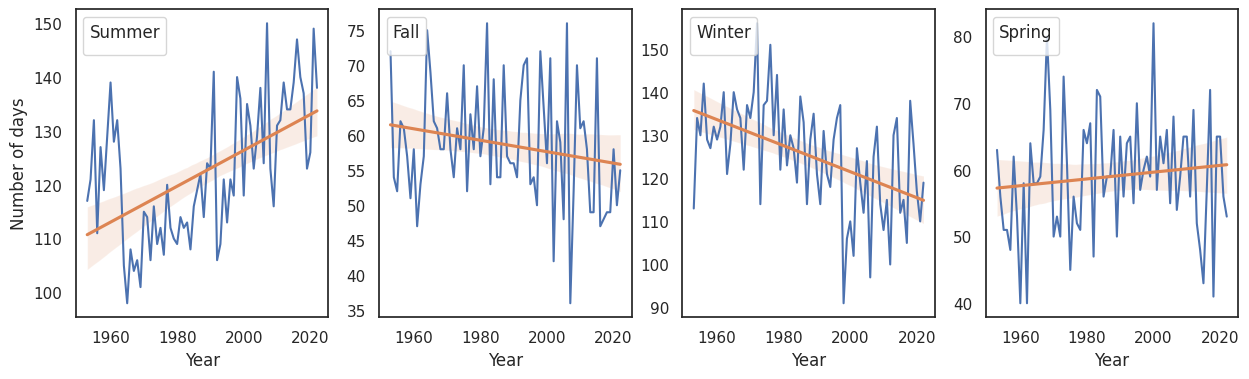

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,4))
g = sns.lineplot(data=df.loc[df['kmedoids_season_name']=='Summer'], x="year",y="count",ci=None, ax=ax1)
sns.regplot( data=df.loc[df['kmedoids_season_name']=='Summer'],x='year',y= 'count', scatter=False, ax=ax1)
g = sns.lineplot(data=df.loc[df['kmedoids_season_name']=='Fall'], x="year",y="count",ci=None, ax=ax2)
sns.regplot( data=df.loc[df['kmedoids_season_name']=='Fall'],x='year',y= 'count', scatter=False, ax=ax2)
g = sns.lineplot(data=df.loc[df['kmedoids_season_name']=='Winter'], x="year",y="count",ci=None, ax=ax3)
sns.regplot( data=df.loc[df['kmedoids_season_name']=='Winter'],x='year',y= 'count', scatter=False, ax=ax3)
g = sns.lineplot(data=df.loc[df['kmedoids_season_name']=='Spring'], x="year",y="count",ci=None, ax=ax4)
sns.regplot( data=df.loc[df['kmedoids_season_name']=='Spring'],x='year',y= 'count', scatter=False, ax=ax4)
ax1.legend(title='Summer',loc='upper left')
ax2.legend(title='Fall',loc='upper left', labels=[])
ax3.legend(title='Winter',loc='upper left', labels=[])
ax4.legend(title='Spring',loc='upper left', labels=[])
ax1.set_xlabel("Year")
ax2.set_xlabel("Year")
ax3.set_xlabel("Year")
ax4.set_xlabel("Year")
ax1.set_ylabel("Number of days")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax4.set_ylabel("")

In [ ]:
print(mk.original_test(df.loc[df['kmedoids_season_name']=='Summer']['count'].values, alpha=0.01))
print(mk.original_test(df.loc[df['kmedoids_season_name']=='Fall']['count'].values, alpha=0.01))
print(mk.original_test(df.loc[df['kmedoids_season_name']=='Winter']['count'].values, alpha=0.01))
print(mk.original_test(df.loc[df['kmedoids_season_name']=='Spring']['count'].values, alpha=0.1))

Mann_Kendall_Test(trend='increasing', h=True, p=1.2987947155540525e-06, z=4.8399382598707446, Tau=0.39544513457556935, s=955.0, var_s=38852.333333333336, slope=0.4, intercept=107.2)
Mann_Kendall_Test(trend='no trend', h=False, p=0.10618652559660546, z=-1.615573646210688, Tau=-0.13209109730848861, s=-319.0, var_s=38743.666666666664, slope=-0.08, intercept=60.76)
Mann_Kendall_Test(trend='decreasing', h=True, p=7.720778222020108e-05, z=-3.952905972227042, Tau=-0.32298136645962733, s=-780.0, var_s=38836.666666666664, slope=-0.29411764705882354, intercept=138.14705882352942)
Mann_Kendall_Test(trend='no trend', h=False, p=0.2955279317318471, z=1.0460716963629366, Tau=0.08571428571428572, s=207.0, var_s=38780.333333333336, slope=0.04878048780487805, intercept=57.31707317073171)


In [ ]:
df = data.groupby(['year','agglomerative_season_name'])['agglomerative_season_name'].count().reset_index(name="count")

Text(0, 0.5, '')

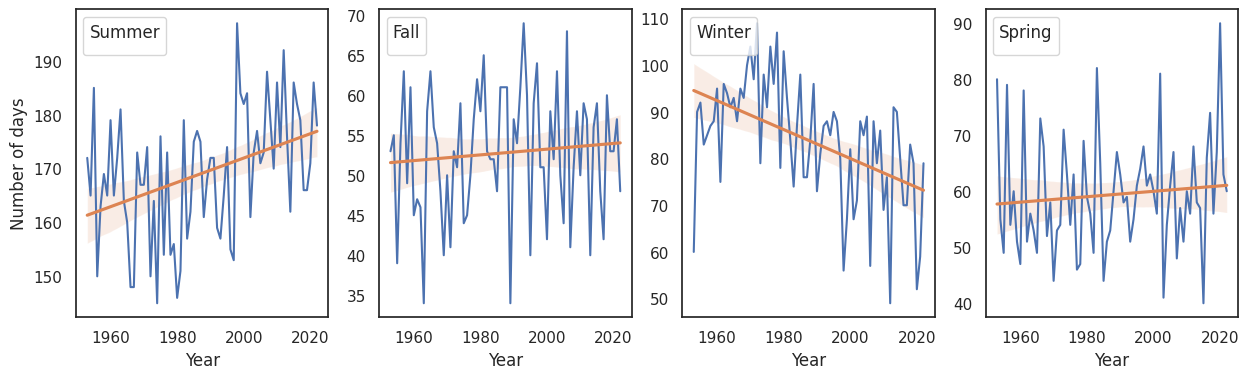

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,4))
g = sns.lineplot(data=df.loc[df['agglomerative_season_name']=='Summer'], x="year",y="count",ci=None, ax=ax1)
sns.regplot( data=df.loc[df['agglomerative_season_name']=='Summer'],x='year',y= 'count', scatter=False, ax=ax1)
g = sns.lineplot(data=df.loc[df['agglomerative_season_name']=='Fall'], x="year",y="count",ci=None, ax=ax2)
sns.regplot( data=df.loc[df['agglomerative_season_name']=='Fall'],x='year',y= 'count', scatter=False, ax=ax2)
g = sns.lineplot(data=df.loc[df['agglomerative_season_name']=='Winter'], x="year",y="count",ci=None, ax=ax3)
sns.regplot( data=df.loc[df['agglomerative_season_name']=='Winter'],x='year',y= 'count', scatter=False, ax=ax3)
g = sns.lineplot(data=df.loc[df['agglomerative_season_name']=='Spring'], x="year",y="count",ci=None, ax=ax4)
sns.regplot( data=df.loc[df['agglomerative_season_name']=='Spring'],x='year',y= 'count', scatter=False, ax=ax4)
ax1.legend(title='Summer',loc='upper left')
ax2.legend(title='Fall',loc='upper left', labels=[])
ax3.legend(title='Winter',loc='upper left', labels=[])
ax4.legend(title='Spring',loc='upper left', labels=[])
ax1.set_xlabel("Year")
ax2.set_xlabel("Year")
ax3.set_xlabel("Year")
ax4.set_xlabel("Year")
ax1.set_ylabel("Number of days")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax4.set_ylabel("")

In [ ]:
df

year agglomerative_season_name  count
0    1953                      Fall     53
1    1953                    Spring     80
2    1953                    Summer    172
3    1953                    Winter     60
4    1954                      Fall     55
..    ...                       ...    ...
275  2021                    Winter     59
276  2022                      Fall     48
277  2022                    Spring     60
278  2022                    Summer    178
279  2022                    Winter     79

[280 rows x 3 columns]

In [ ]:
print(mk.original_test(df.loc[df['agglomerative_season_name']=='Summer']['count'].values, alpha=0.01))
print(mk.original_test(df.loc[df['agglomerative_season_name']=='Fall']['count'].values, alpha=0.1))
print(mk.original_test(df.loc[df['agglomerative_season_name']=='Winter']['count'].values, alpha=0.01))
print(mk.original_test(df.loc[df['agglomerative_season_name']=='Spring']['count'].values, alpha=0.1))

Mann_Kendall_Test(trend='increasing', h=True, p=0.0016295421450722714, z=3.1505663940622064, Tau=0.25755693581780537, s=622.0, var_s=38851.333333333336, slope=0.22413793103448276, intercept=163.26724137931035)
Mann_Kendall_Test(trend='no trend', h=False, p=0.5730893956661411, z=0.5635074394739279, Tau=0.0463768115942029, s=112.0, var_s=38801.333333333336, slope=0.027777777777777776, intercept=52.041666666666664)
Mann_Kendall_Test(trend='decreasing', h=True, p=6.373885421462333e-05, z=-3.9985234973722545, Tau=-0.3267080745341615, s=-789.0, var_s=38837.666666666664, slope=-0.28, intercept=96.16)
Mann_Kendall_Test(trend='no trend', h=False, p=0.18185115168173827, z=1.3350769835393383, Tau=0.1093167701863354, s=264.0, var_s=38806.0, slope=0.08333333333333333, intercept=55.125)


In [ ]:
df = data.groupby(['year','agglomerative_season_name'])['agglomerative_season_name'].count().reset_index(name="count")